# Contents and geometry of boreholes
This notebook prototypes method that can extract geometric information about boreholes and their intersection objects.

In [111]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.extend([
    'C:/Users/Haakon/OneDrive/Dokumenter/FORSKNING/mastersproject/src/mastersproject',
    'C:/Users/Haakon/OneDrive/Dokumenter/FORSKNING/mastersproject/src/mastersproject/GTS'
])

# Notebook images
from IPython.display import Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from GTS.ISC_data.isc import ISCData
import numpy as np
import pandas as pd

In [4]:
cls = ISCData()

## Borehole data
First, let's consider coordinates and orientations of the root of each borehole

In [5]:
bh_geom = cls.borehole_data()
bh_geom.head()

,x,y,z,length,diameter,azimuth,upward_gradient,borehole
0,667466.424,158888.882,1732.782,44.80,101,317.05,-31.92,FBS1
1,667470.633,158905.016,1732.725,47.58,101,253.07,-40.46,FBS2
2,667471.317,158926.213,1732.263,44.00,101,219.92,-37.33,FBS3
3,667470.546,158859.278,1746.458,18.20,101,258.89,-75.13,SBH1
4,667468.567,158885.383,1733.960,20.55,101,190.07,4.91,SBH3


In [7]:
struc_intx = cls.borehole_structure_data()
struc_intx.head()

,depth,azimuth,dip,aperture,type,borehole
0,2.35,169.30,57.47,334.61,Minor ductile Shear-zone,FBS1
1,2.99,162.65,58.83,35.70,Minor ductile Shear-zone,FBS1
2,3.27,172.09,58.07,0.00,Foliation,FBS1
3,5.02,163.86,61.26,578.25,Minor ductile Shear-zone,FBS1
4,6.76,169.90,66.49,0.00,Foliation,FBS1


## Our aim is to convert the relative coordinates of a structure to global Swiss coordinates.

The following formula applies:

\begin{equation}
\begin{bmatrix}
struc_x\\ struc_y\\ struc_z\\
\end{bmatrix}
= \begin{bmatrix}
bh_x\\ bh_y \\ bh_z
\end{bmatrix}
+ depth(struc)
\cdot \begin{bmatrix}
\cos\theta \sin \gamma \\
\cos \theta \cos \gamma \\
\sin \theta \\
\end{bmatrix}
\end{equation}

Noting the following variables: \
$struc$ is the structure under consideration (e.g. a shearzone). \
$bh$ is the coordinates of the borehole \
$depth(struc)$ is depth of the structure in the borehole. \
$\theta$ is upward gradient of borehole\
$\gamma$ is the azimuth of borehole

In [24]:
# def struc_bh_to_global(x: float, y: float, z: float, 
#                        depth: float, theta: float, gamma: float):
#     """ Convert a structure to global coordinates
    
#     Parameters:
#     x (float): Borehole Coordinate, x 
#     y (float): Borehole Coordinate, y
#     z (float): Borehole Coordinate, z 
#     depth (float): Depth in borehole to compute [m]
#     theta (float): upward gradient of borehole  [deg]
#     gamma (float): azimuth of borehole          [deg]
    
#     """
#     rad = np.pi/180
#     th = theta * rad
#     ga = gamma * rad
#     return bh + depth * np.array([np.cos(th) * np.sin(ga), 
#                                   np.cos(th) * np.cos(ga),
#                                   np.sin(th)])

# def row_struc_bh_to_global(data, cols):
#     """ Wrapper for local-to-global conversion of borehole structures
    
#     Parameters:
#     data (pd.DataFrame): data
#     cols (list): column names.
#         Index of a column name corresponds to index of the parameter in
#         struc_bh_to_global(x, y, z, depth, theta, gamma)
#     """
#     struc_bh_to_global()


# def df_struc_bh_to_global(row: pd.Series,
#                           x: str,
#                           y: str,
#                           z: str,
#                           depth: str, 
#                           theta: str, 
#                           gamma: str,
#                           broadcast=True,
#                           columns=None):
#     """ Wrapper for DataFrames to convert from local to global coordinates.
    
#     Wrapper of struc_bh_to_global(...) to convert local coordinates to global 
#     coordinates for each row in a DataFrame
    
#     Parameters:
#     row (pd.Series): Row to apply 'struc_bh_to_global' to.
#     x, y, z (str): column names to find (x, y, z) coordinate columns, respectively
#     depth (str): Column name to locate depth in borehole
#     theta (str): Column name to locate theta (upward gradient) of borehole.
#     gamma (str): Column name to locate gamma (azimuth) of borehole.
#     broadcast (bool, optional, Default: True): 
#         False or None: Returns a series whose length is the length of the index.
#         True: Results will be broadcast to the original frame with column names
#             determined by the parameter 'columns'.
#     columns (dict, optional)
#         Dictionary mapping 'x', 'y', 'z' outputs to 
    
#     """
#     # Map from struc_bh_to_global(...) parameters to DataFrame column names
#     cm = {'x': coords[0], 'y': coords[1], 'z': coords[2],
#           'depth': depth, 'theta': theta, 'gamma': gamma}
    
#     # Do the calculation
#     result = struc_bh_to_global(x=row[x], y=row[y], z=, 
#                        depth: float, theta: float, gamma: float)

In [71]:
def swiss_to_gts(v):
    """ Convert from swiss coordinates to gts coordinates
    
    GTS coordinates are: (x,y,z) = (667400, 158800, 1700)
    
    Parameters:
    v (np.array (3,)): Coordinate array
    
    """
    return v - np.array([667400, 158800, 1700])

## Testing
Informal testing. Verify endpoints of boreholes visually using matplot visualization tool

In [101]:
#GEO
wells = ['GEO1', 'GEO2', 'GEO3', 'GEO4']
geo = bh_geom[bh_geom['borehole'].isin(wells)]
geo

,x,y,z,length,diameter,azimuth,upward_gradient,borehole
11,667470.730,158896.006,1732.364,30.26,86,270.33,-47.79,GEO1
12,667470.589,158896.008,1732.496,40.09,86,270.03,-34.20,GEO2
13,667470.923,158912.008,1732.416,30.10,86,269.96,-47.80,GEO3
14,667470.776,158912.000,1732.618,40.05,86,270.03,-34.22,GEO4


In [95]:
# Calculate the trigonometric scaling
rad = np.pi/180
geo.loc[:, '_angles_x'] = (geo['upward_gradient'] * rad).apply(np.cos) * \
                          (geo['azimuth'] * rad).apply(np.sin)

geo.loc[:, '_angles_y'] = (geo['upward_gradient'] * rad).apply(np.cos) * \
                          (geo['azimuth'] * rad).apply(np.cos)

geo.loc[:, '_angles_z'] = (geo['upward_gradient'] * rad).apply(np.sin)

In [96]:
geo.loc[:, 'x_swiss'] = geo['x'] + (geo['length'] * geo['_angles_x'])
geo.loc[:, 'y_swiss'] = geo['y'] + (geo['length'] * geo['_angles_y'])
geo.loc[:, 'z_swiss'] = geo['z'] + (geo['length'] * geo['_angles_z'])

In [97]:
geo[['x_gts', 'y_gts', 'z_gts']] = \
geo[['x_swiss', 'y_swiss', 'z_swiss']].apply(swiss_to_gts, axis=1, raw=True, result_type='expand')


In [98]:
geo

,x,y,z,length,diameter,azimuth,upward_gradient,borehole,_angles_x,_angles_y,_angles_z,x_swiss,y_swiss,z_swiss,x_gts,y_gts,z_gts
11,667470.730,158896.006,1732.364,30.26,86,270.33,-47.79,GEO1,-0.671839,0.003870,-0.740687,667450.400160,158896.123093,1709.950801,50.400160,96.123093,9.950801
12,667470.589,158896.008,1732.496,40.09,86,270.03,-34.20,GEO2,-0.827080,0.000433,-0.562083,667437.431344,158896.025361,1709.962077,37.431344,96.025361,9.962077
13,667470.923,158912.008,1732.416,30.10,86,269.96,-47.80,GEO3,-0.671720,-0.000469,-0.740805,667450.704215,158911.993885,1710.117782,50.704215,111.993885,10.117782
14,667470.776,158912.000,1732.618,40.05,86,270.03,-34.22,GEO4,-0.826884,0.000433,-0.562372,667437.659288,158912.017340,1710.094999,37.659288,112.017340,10.094999


# Make the testing above into a method

In [99]:
def bh_struc_to_gobal_coords(data: pd.DataFrame, *,
                             x: str, y: str, z: str, depth: str, 
                             upward_gradient: str, azimuth: str,
                            ):
    """ Convert coordinates in a borehole to global coordinates
    
    For all rows in a DataFrame, convert some (x,y,z) coordinates to global
    coordinates, localized to Swiss and/or GTS.
    
    Parameters:
    data (pd.DataFrame)
    x, y, z, depth, upward_gradient, azimuth (str): 
        Column names for the respective quantities
    """

    # Compute angle scalers
    rad = np.pi / 180
    geo.loc[:, '_trig_x'] = (geo[upward_gradient] * rad).apply(np.cos) * \
                              (geo[azimuth] * rad).apply(np.sin)

    geo.loc[:, '_trig_y'] = (geo[upward_gradient] * rad).apply(np.cos) * \
                              (geo[azimuth] * rad).apply(np.cos)

    geo.loc[:, '_trig_z'] = (geo[upward_gradient] * rad).apply(np.sin)
    
    # Swiss coordinates
    geo.loc[:, 'x_swiss'] = geo[x] + (geo[depth] * geo['_trig_x'])
    geo.loc[:, 'y_swiss'] = geo[y] + (geo[depth] * geo['_trig_y'])
    geo.loc[:, 'z_swiss'] = geo[z] + (geo[depth] * geo['_trig_z'])
    
    # GTS coordinates
    geo[['x_gts', 'y_gts', 'z_gts']] = \
    geo[['x_swiss', 'y_swiss', 'z_swiss']].apply(swiss_to_gts, axis=1, 
                                                 raw=True, result_type='expand')



## Test the unified method 

In [102]:
geo

,x,y,z,length,diameter,azimuth,upward_gradient,borehole
11,667470.730,158896.006,1732.364,30.26,86,270.33,-47.79,GEO1
12,667470.589,158896.008,1732.496,40.09,86,270.03,-34.20,GEO2
13,667470.923,158912.008,1732.416,30.10,86,269.96,-47.80,GEO3
14,667470.776,158912.000,1732.618,40.05,86,270.03,-34.22,GEO4


In [103]:
mapping = {'x': 'x', 'y': 'y', 'z': 'z', 'depth': 'length', 
           'upward_gradient': 'upward_gradient', 'azimuth': 'azimuth'}
bh_struc_to_gobal_coords(geo, **mapping)

In [105]:
geo[['borehole', 'x_gts', 'y_gts', 'z_gts']]

,borehole,x_gts,y_gts,z_gts
11,GEO1,50.400160,96.123093,9.950801
12,GEO2,37.431344,96.025361,9.962077
13,GEO3,50.704215,111.993885,10.117782
14,GEO4,37.659288,112.017340,10.094999


## Success!
Confirmed by checking with the matlab visualization.

(Compare values above with coordinated in image below)

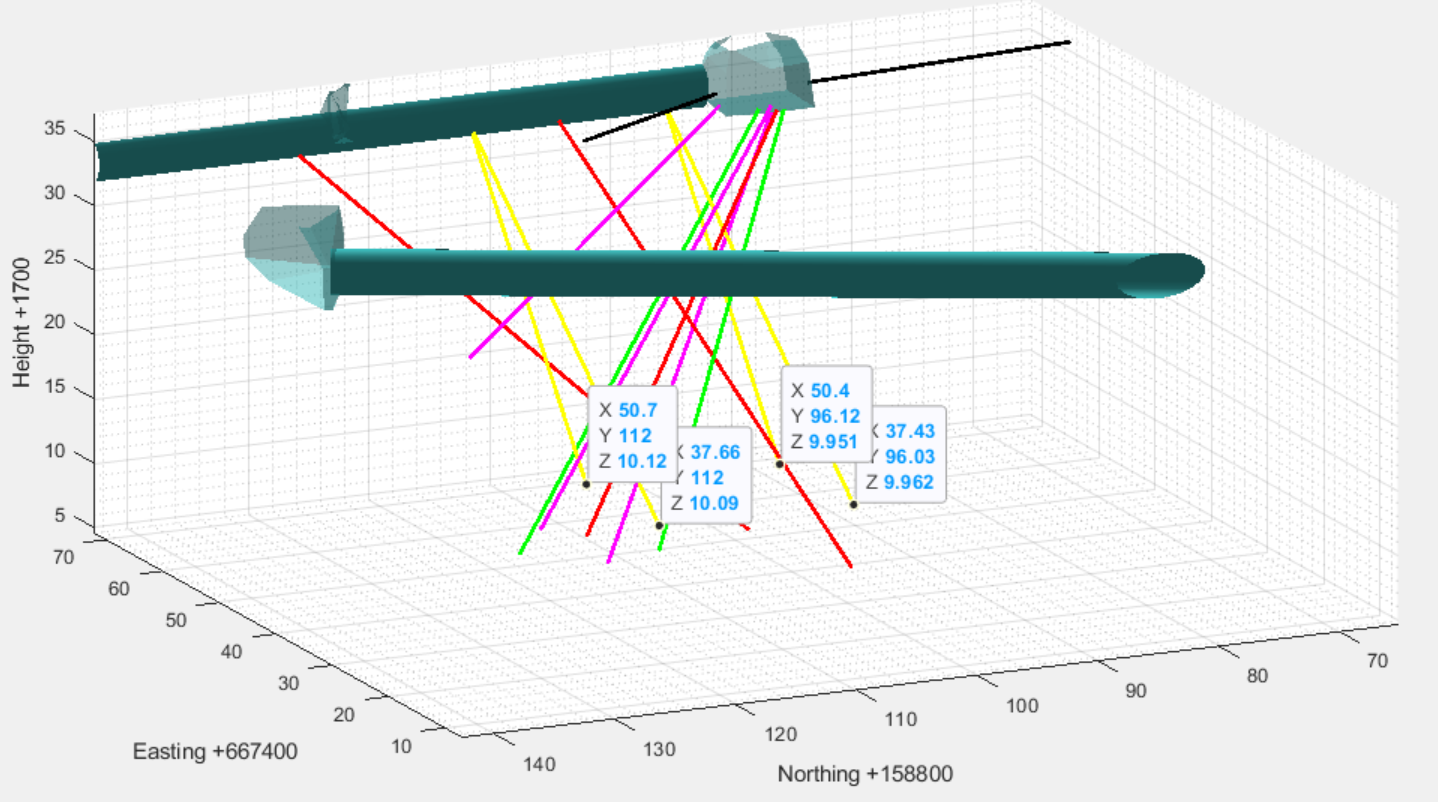